In [1]:
from PIL import Image
from pytesseract import image_to_string
import pytesseract
import numpy as np
import pandas as pd
import PIL
from PIL import Image, ImageFilter, ImageEnhance
import cv2
import colorsys
import dill
# dill.dump_session('Extract.db')
dill.load_session('Extract.db')

**UNINSTALL AND REINSTALL**

https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-setup-3.05.02-20180621.exe


Uninstall previously installed tesseract application and reinstall it with above link.

In [0]:
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"

**ORIGINAL**

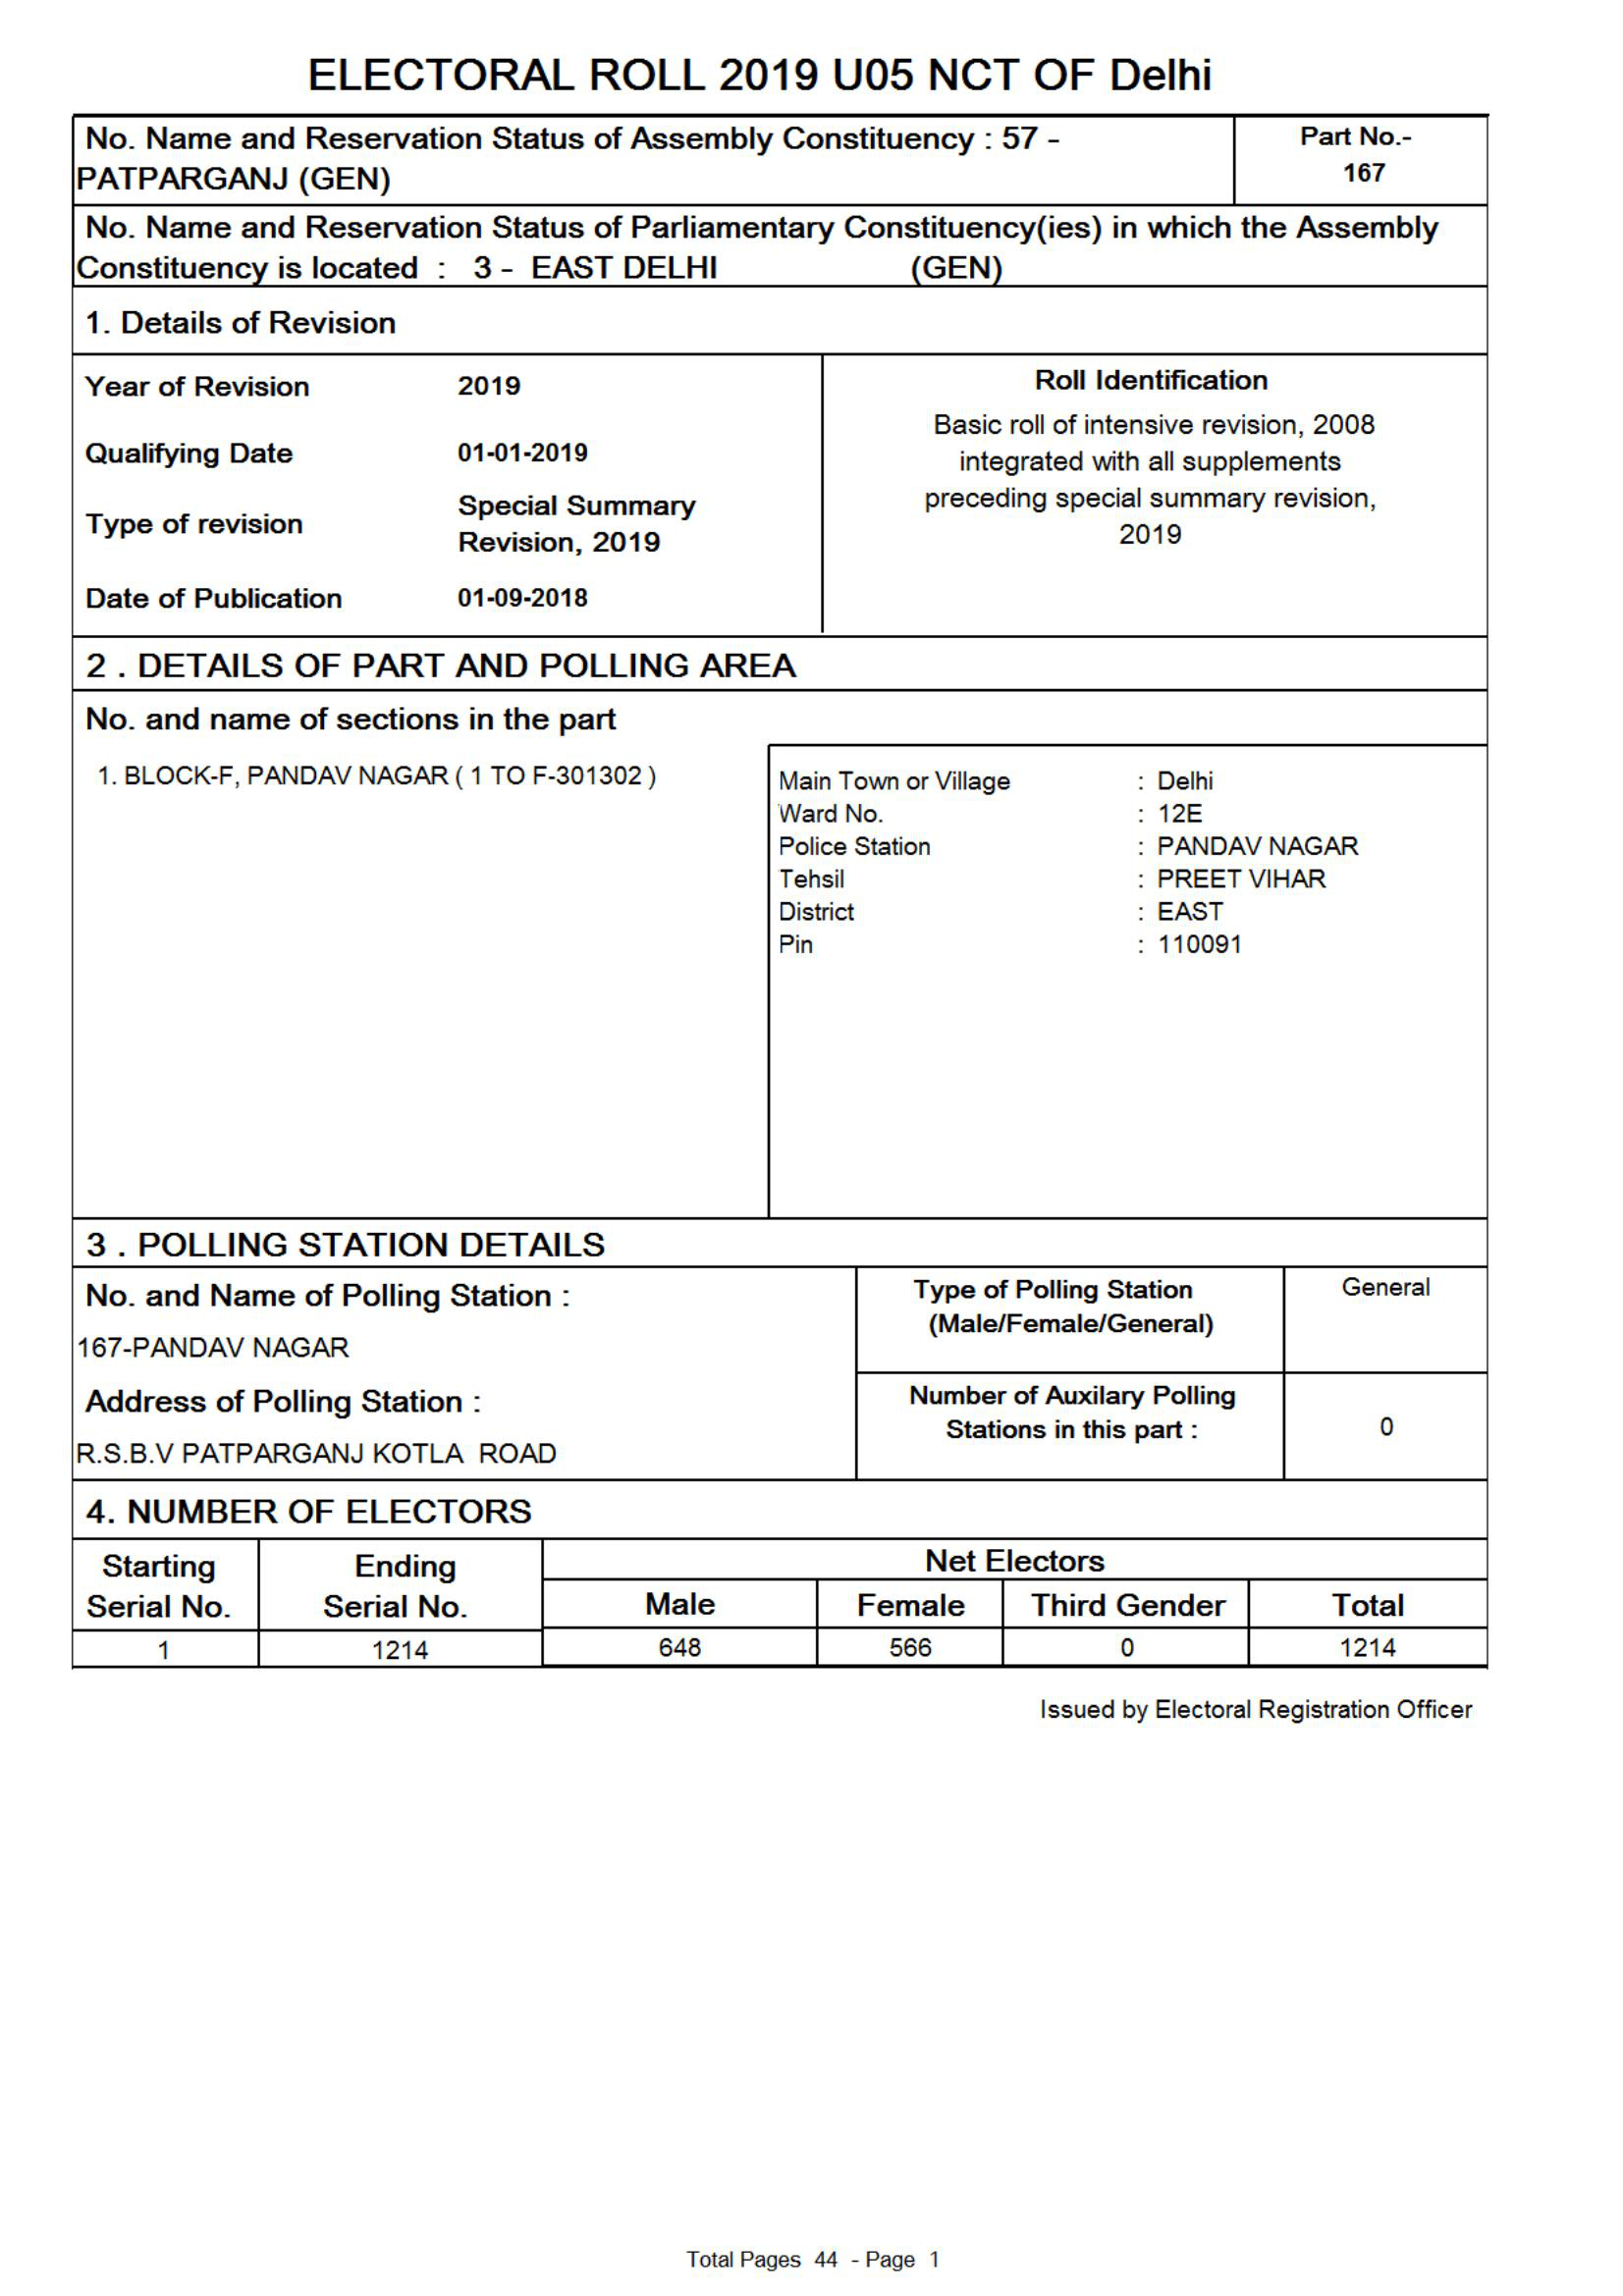

In [3]:
im = Image.open("/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P167_1.jpeg")
im

**Rescaling**

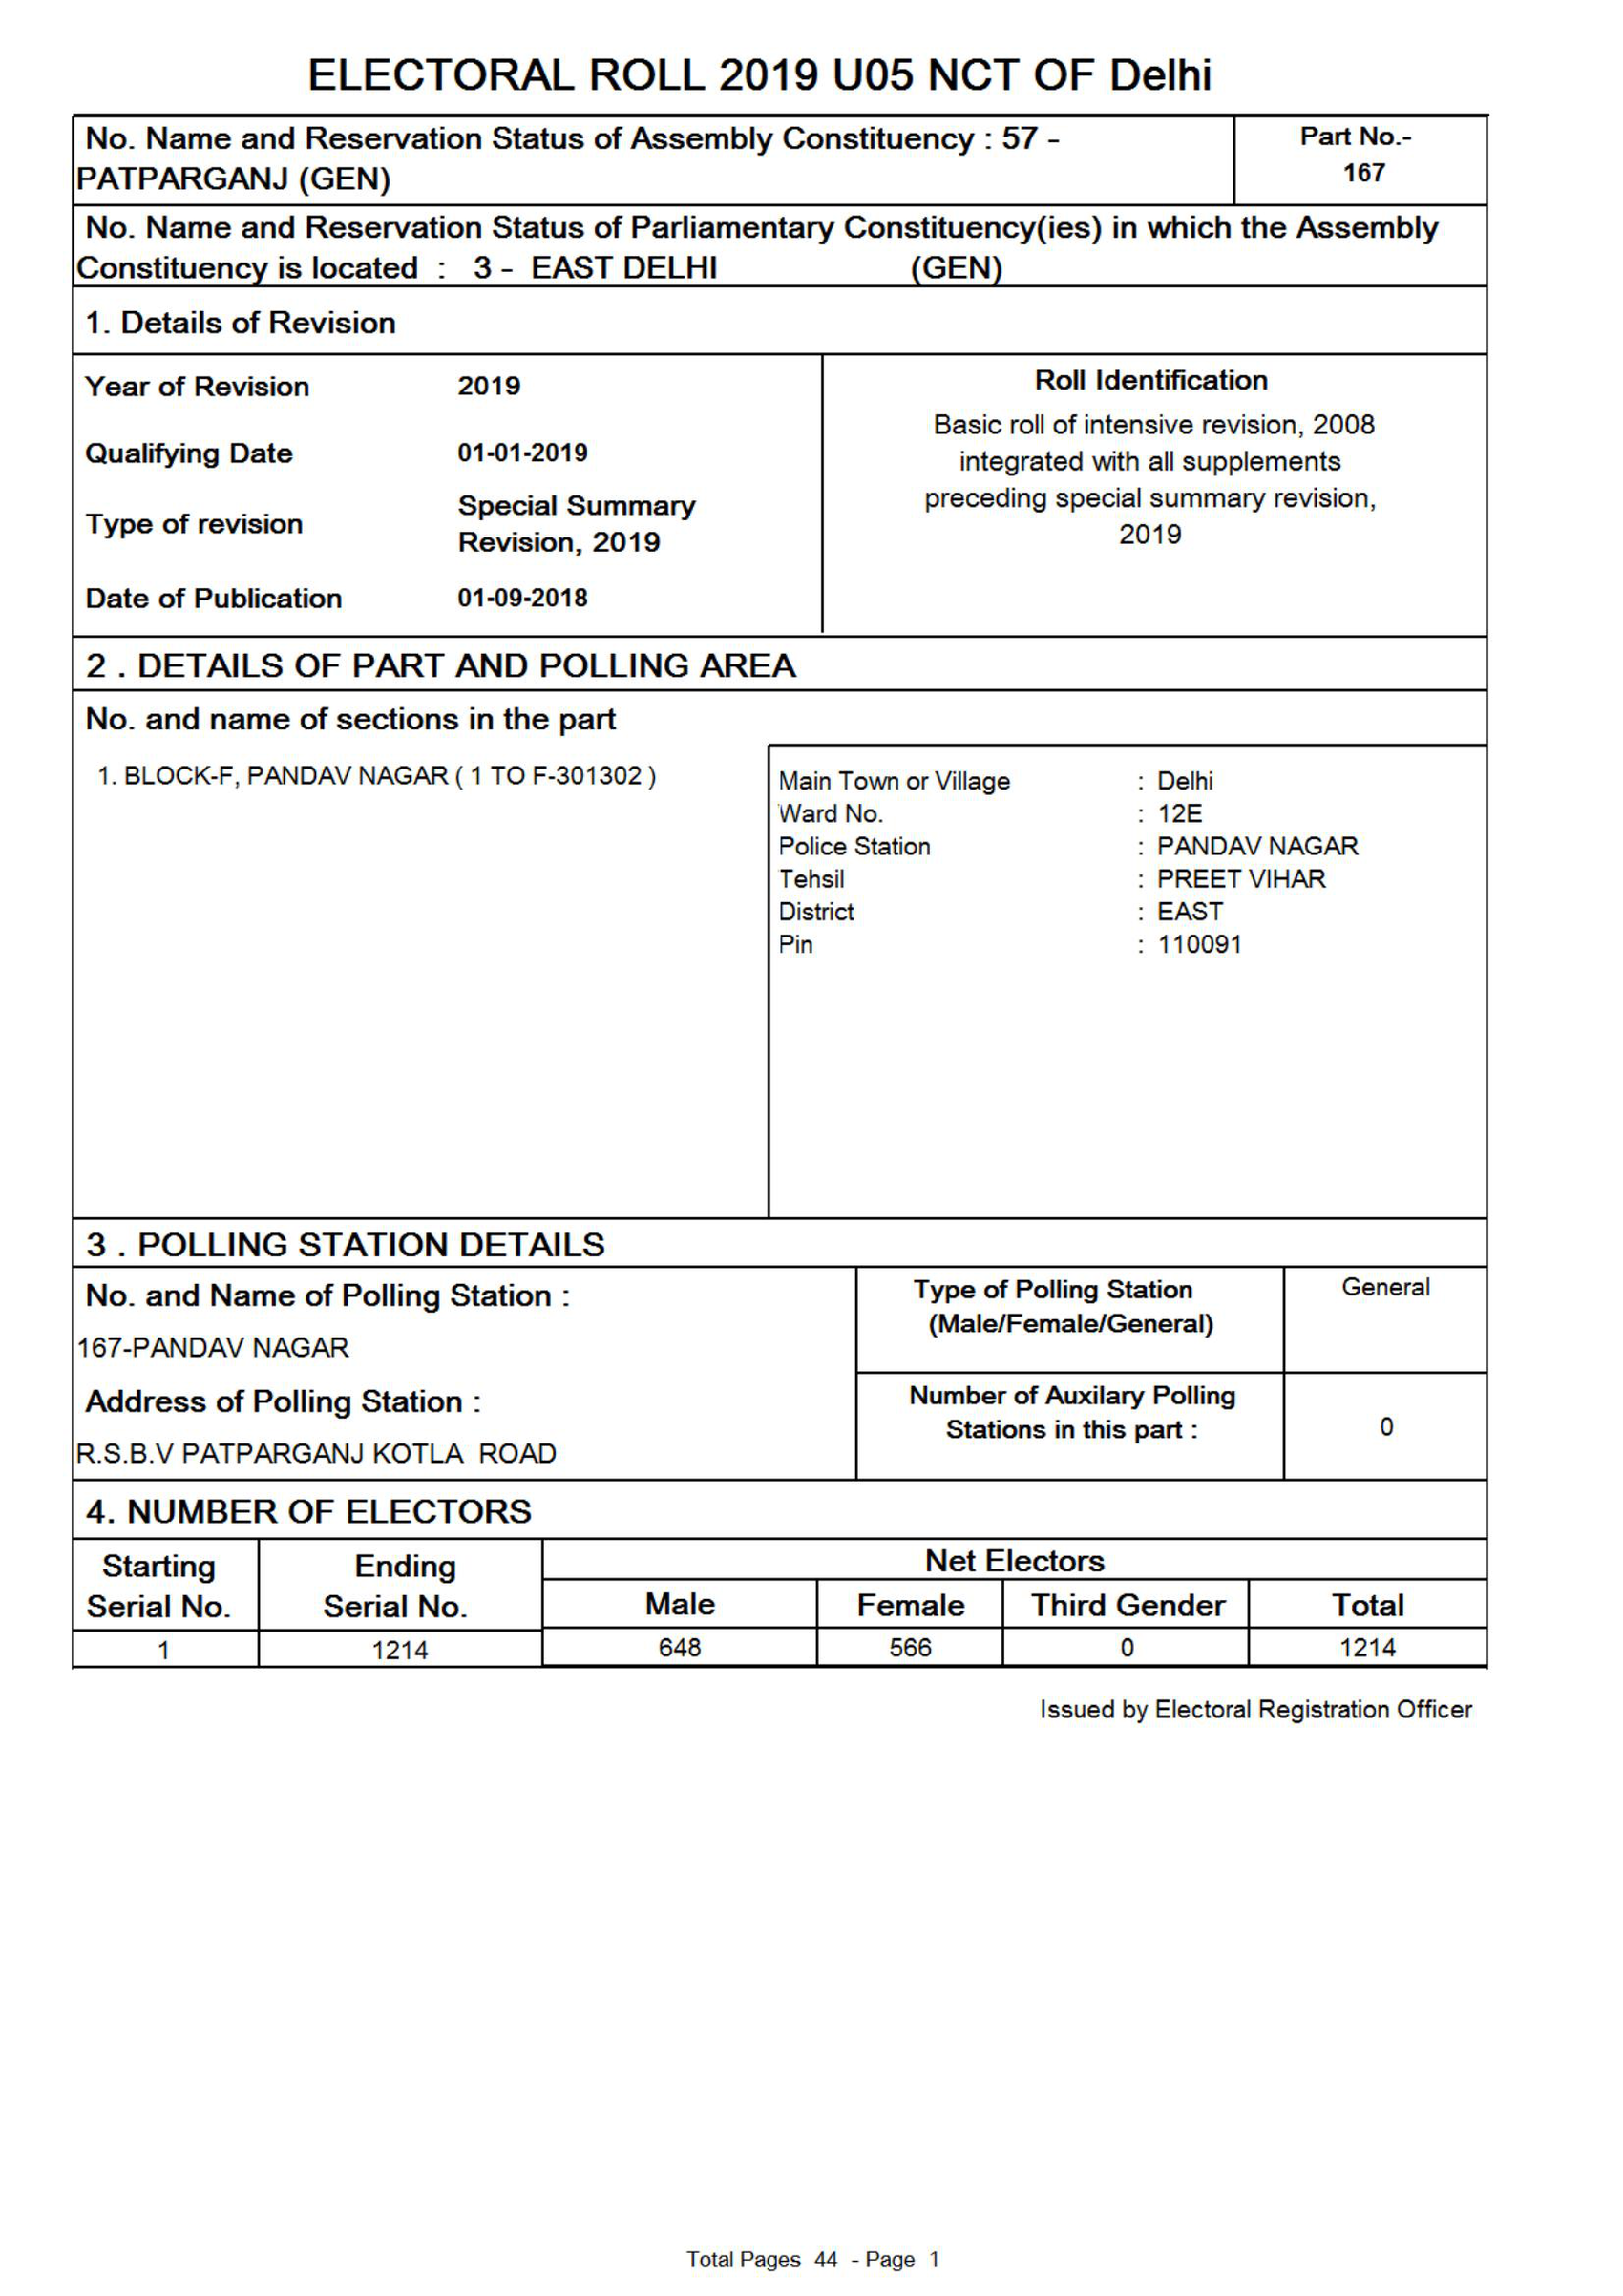

In [4]:
basewidth = 1700
wpercent = (basewidth / float(im.size[0]))
hsize = int((float(im.size[1]) * float(wpercent)))
imz = im.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
imz

**Making Image Binary**

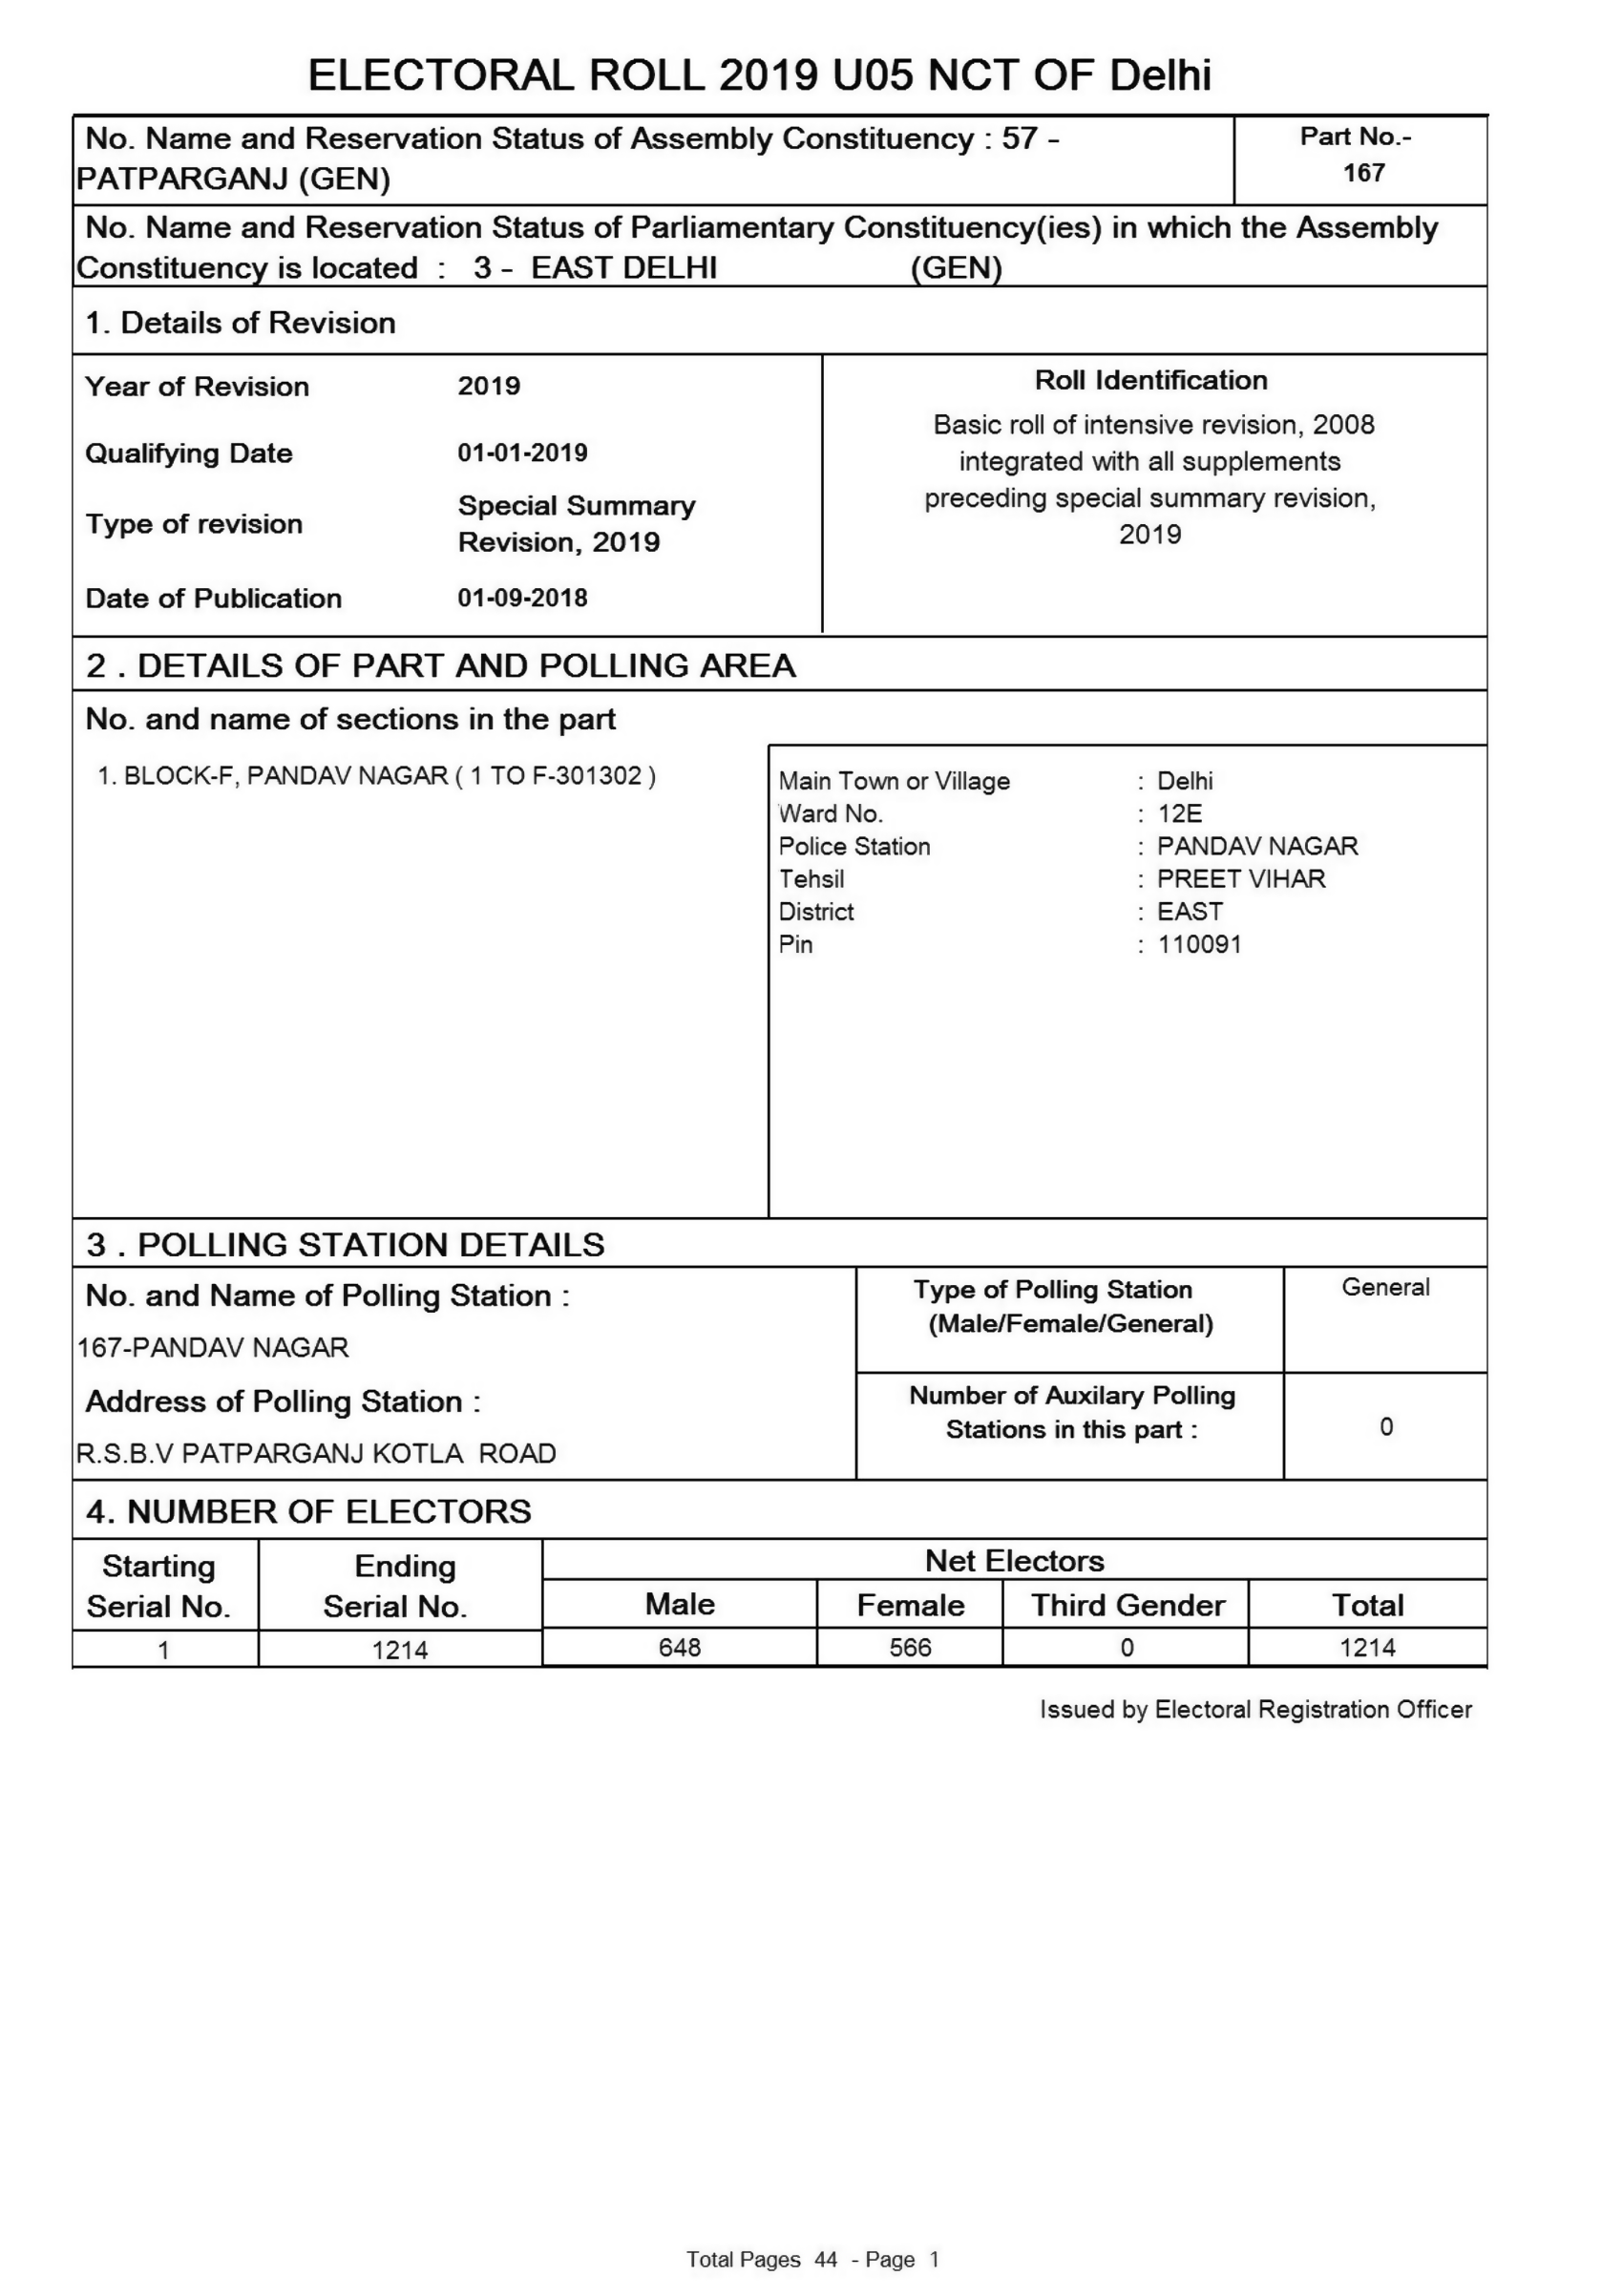

In [5]:
im = cv2.bilateralFilter(np.array(imz,dtype=np.uint8),9,75,75)
imb = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ims  = Image.fromarray(imb)   
ims

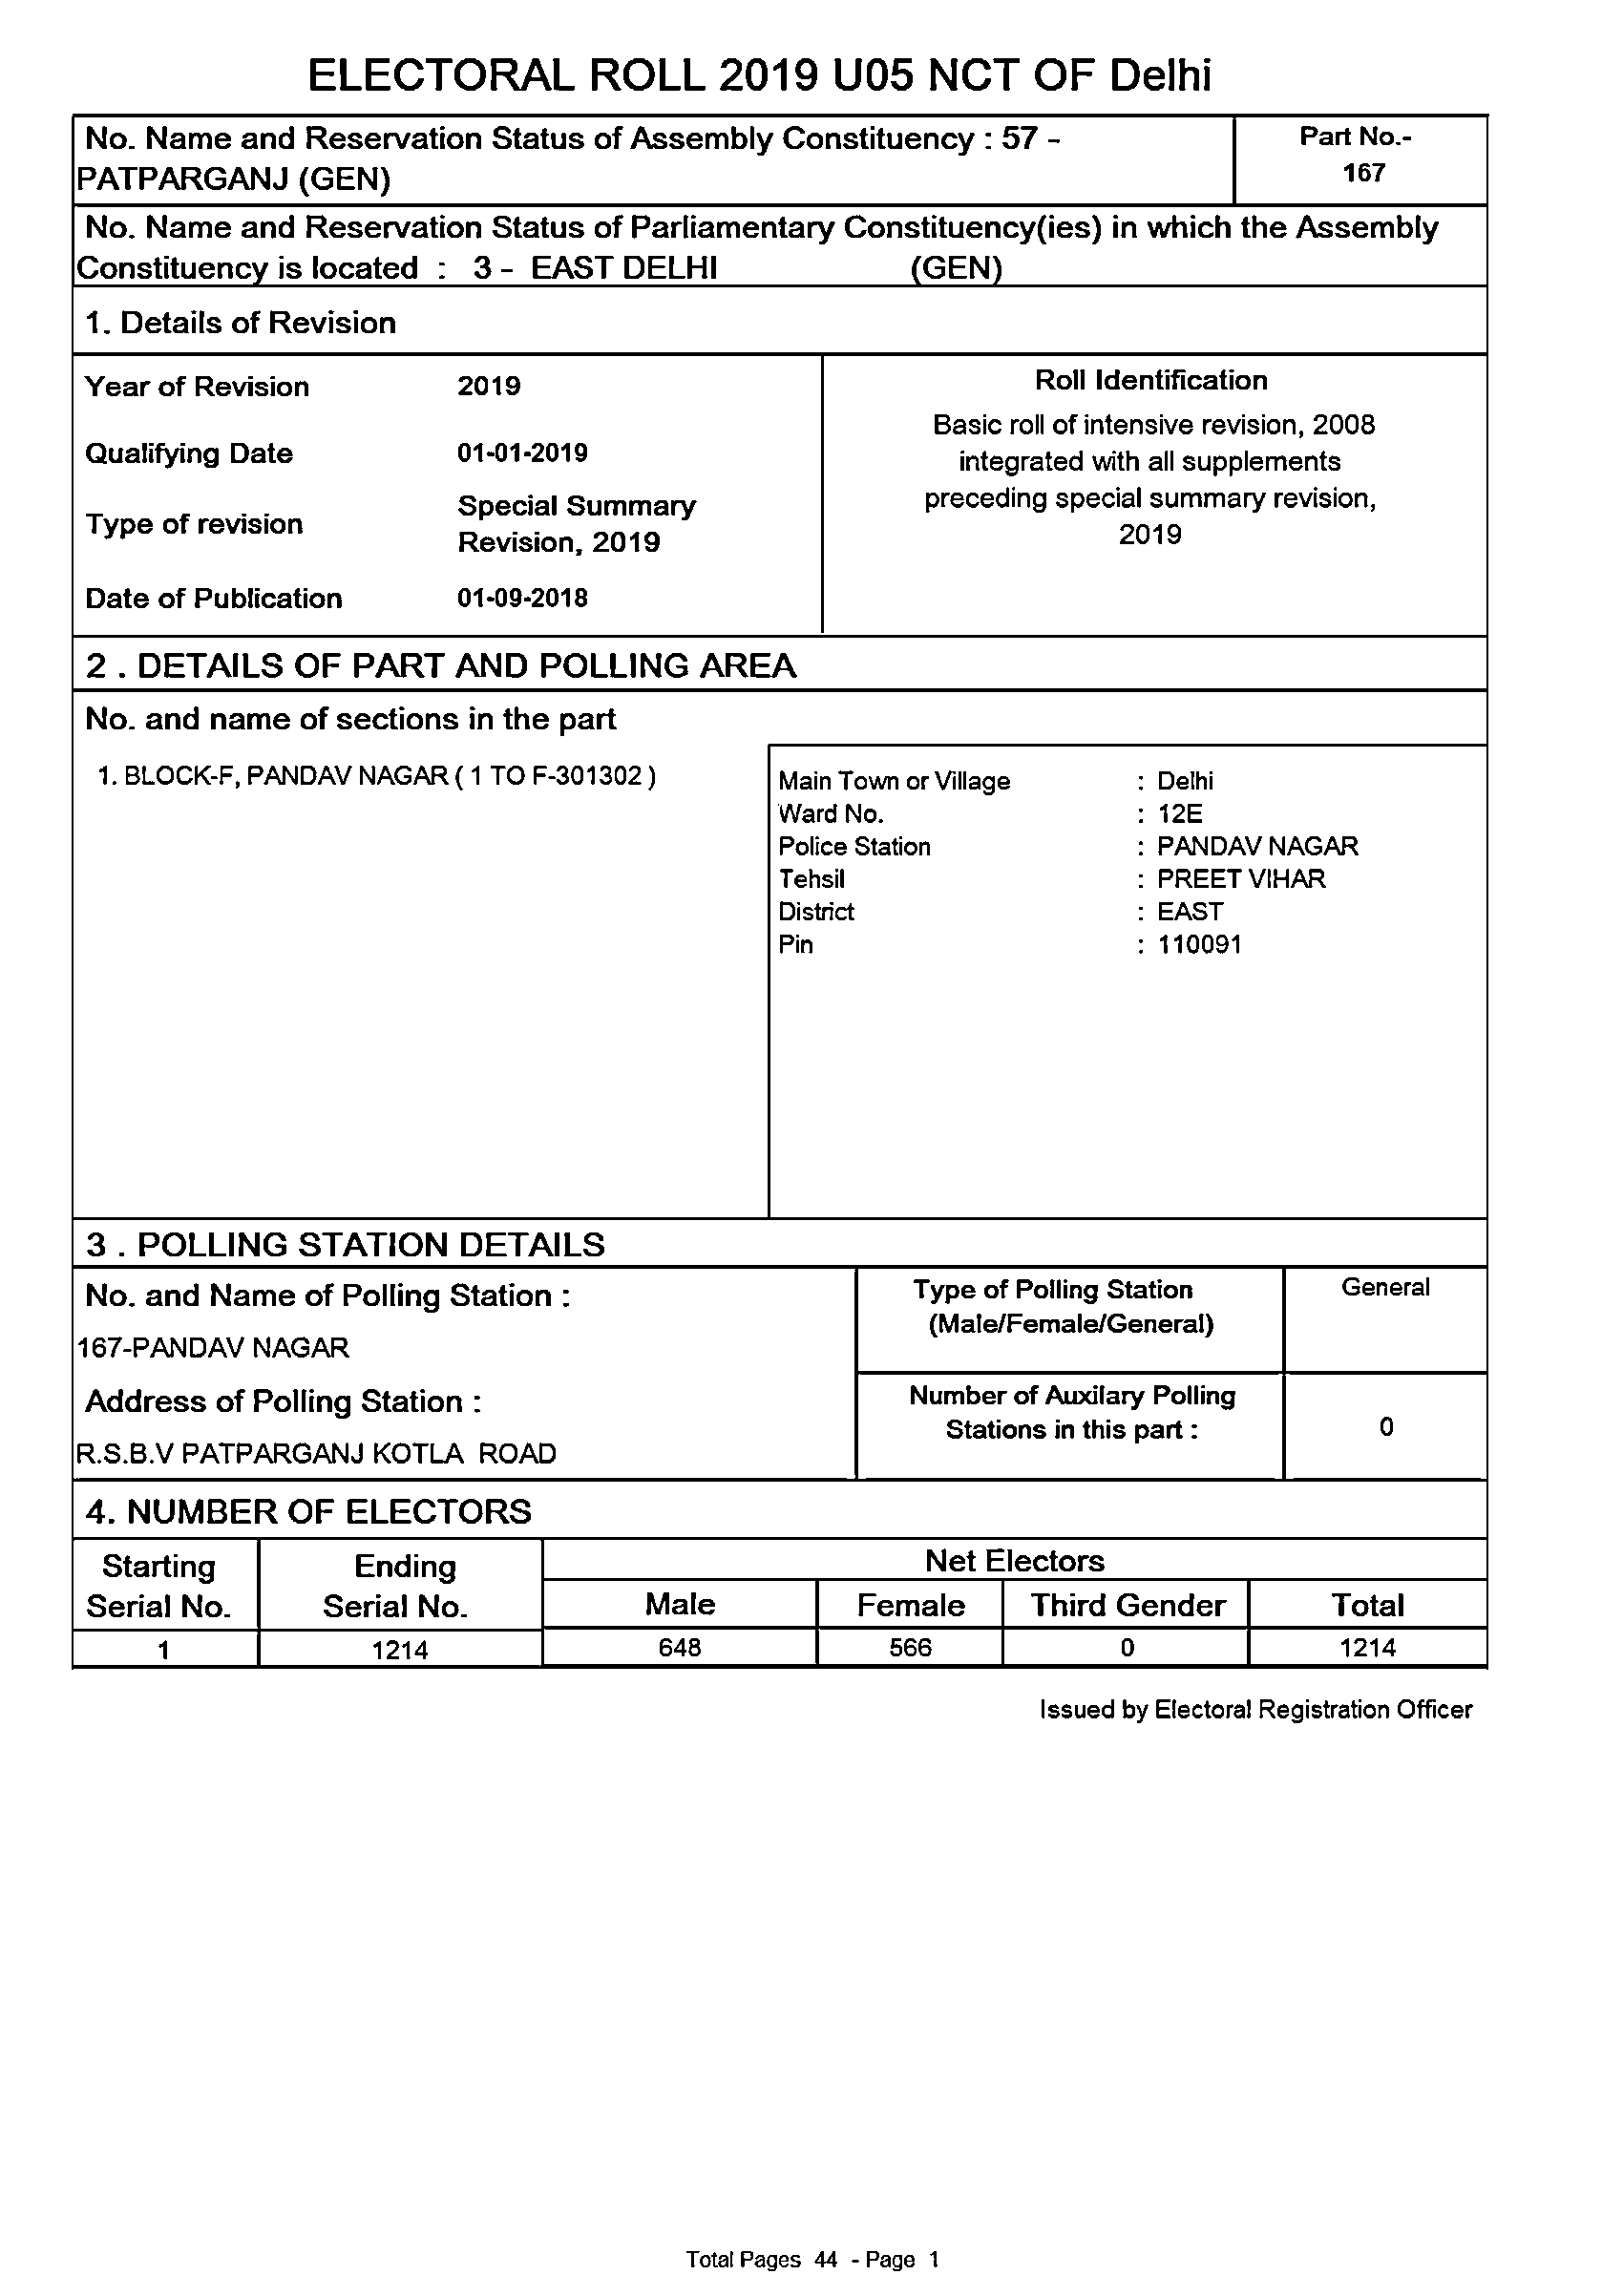

In [6]:
im = cv2.adaptiveThreshold(np.array(ims,dtype=np.uint8), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 11)
im = Image.fromarray(im)
im

**Things required to be extracted**

1. Vidhan Sabha name
2. Part No/Bhag Sankhya
3. Details of part and polling area/
4. No. and name of polling station
5. Male/Female/Total
6. File Name

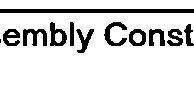

In [2]:
crop_rectangle_vs = (716, 110, 910, 202)
cropped_im_vs = im.crop(crop_rectangle_vs)
crop_rectangle_bs = (1462, 110, 1550, 205)
cropped_im_bs = im.crop(crop_rectangle_bs)
# crop_rectangle_mg = (830, 737, 1017, 770)
# cropped_im_mg = im.crop(crop_rectangle_mg)
crop_rectangle_psn = (159, 1550, 1050, 1630)
cropped_im_psn = im.crop(crop_rectangle_psn)
crop_rectangle_psa = (170, 1670, 1125, 1725)
cropped_im_psa = im.crop(crop_rectangle_psa)
crop_rectangle_male = (820, 1965, 955, 2050)
cropped_im_male = im.crop(crop_rectangle_male)
crop_rectangle_fem = (1020, 1965, 1175, 2050)
cropped_im_fem = im.crop(crop_rectangle_fem)
crop_rectangle_tot = (1400, 1965, 1565, 2050)
cropped_im_tot = im.crop(crop_rectangle_tot)
cropped_im_vs

In [7]:
import glob
# To input only first page of pdfs, we will input all jpgs path whose file name is ending with '-01.jpg'
onlyfiles = glob.glob('/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/*_1.jpeg')

In [8]:
s ='/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/*_1.jpeg'
s = s.split('/')
s[6]

'*_1.jpeg'

We require file name for every file our code reads. To read that we will input file name from the path.
For example, when I read onlyfiles list I have created above, it shows paths such as
'C:/Users/SUYASH/Downloads/AC0020001\\\ **AC0020001**-01.jpg'

Here we require highlighted text. To get that we will split the string with respect to '\\\'. Our O/P will be a list as follows.

['C:/Users/SUYASH/Downloads/AC0020001','**AC0020001**-01.jpg']

Then we will take second part of the list('**AC0020001**-01.jpg') and split it by '-'. Our O/P will be a list as follows.

['**AC0020001**',01.jpg']

Here first item of the list is our requirement.

In [9]:
def img_to_txt(x):
    s = x.split('/')
    s = s[6].split("_")[0]
    im = Image.open(x)
    basewidth = 1700
    wpercent = (basewidth / float(im.size[0]))
    hsize = int((float(im.size[1]) * float(wpercent)))
    im = im.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    im = cv2.bilateralFilter(np.array(im,dtype=np.uint8),9,75,75)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.adaptiveThreshold(np.array(im,dtype=np.uint8), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 11)
    im = Image.fromarray(im)
    cropped_im_vs = im.crop(crop_rectangle_vs)
    c_vs = image_to_string(cropped_im_vs,config='-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzQWERTYUIOPASDFGHJKLZXCVBNM --psm 6')
    cropped_im_bs = im.crop(crop_rectangle_bs)
    c_bs = image_to_string(cropped_im_bs,config='-c tessedit_char_whitelist=0123456789 --psm 6')
#     cropped_im_mg = im.crop(crop_rectangle_mg)
#     c_mg = image_to_string(cropped_im_mg,lang = 'eng',config='-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz -psm 6')
    cropped_im_psn = im.crop(crop_rectangle_psn)
    c_psn = image_to_string(cropped_im_psn,config='--psm 6')
    cropped_im_psa = im.crop(crop_rectangle_psa)
    c_psa = image_to_string(cropped_im_psa,config='-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzQWERTYUIOPASDFGHJKLZXCVBNM --psm 6')
    cropped_im_male = im.crop(crop_rectangle_male)
    c_male = image_to_string(cropped_im_male,config='-c tessedit_char_whitelist=0123456789 --psm 6')
    cropped_im_fem = im.crop(crop_rectangle_fem)
    c_fem = image_to_string(cropped_im_fem,config='-c tessedit_char_whitelist=0123456789 --psm 6')
    cropped_im_tot = im.crop(crop_rectangle_tot)
    c_tot = image_to_string(cropped_im_tot,config='-c tessedit_char_whitelist=0123456789 --psm 6')
    return c_vs,c_bs,c_psn,c_psa,s,c_male,c_fem,c_tot


In [10]:
onlyfiles

['/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P167_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P168_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P169_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P170_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P171_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P172_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P173_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P174_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P175_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P176_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P177_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P178_1.jpeg',
 '/e_drive/MCA/Pyhton(Jupyter)/Data Analysis/pics_task/U05A57P179_1.jpeg',
 '/e_drive/MCA/Pyhton(Jup

In [11]:
vidhnsbha = []
bhag_snkhya = []
main_vil = []
PS_name = []
PS_add = []
file_name = []
male = []
female = []
total = []
for i in onlyfiles:
    a,b,d,e,s,m,f,o = img_to_txt(i)
    vidhnsbha.append(a)
    bhag_snkhya.append(b)
#     main_vil.append(c)
    PS_name.append(d)
    PS_add.append(e)
    file_name.append(s)
    male.append(m)
    female.append(f)
    total.append(o)
# vidhnsbha

In [12]:
import numpy as np
front_pange = pd.DataFrame(np.column_stack([vidhnsbha, bhag_snkhya,PS_name,PS_add,male,female,total,file_name]), 
                               columns=['vidhan_sabha', 'bhag_sankhya','PS_name','PS_add','male','female','total','file_name'])

In [13]:
front_pange.head(30)

,vidhan_sabha,bhag_sankhya,PS_name,PS_add,male,female,total,file_name
0,embly Const,,UMBER OF ELECTORS,lNoe I Serial Noe Male I Female Thi,,,,U05A57P167
1,embly Const,,UMBER OF ELECTORS,lNoe I Serial Noe Male I Female Thi,,,,U05A57P168
2,embly Const,,UMBER OF ELECTORS,lNoe I Serial Noe Male I Female Thi,,,,U05A57P169
3,embly Const,,UMBER OF ELECTORS,lNoe I Serial Noe Male I Female Thi,,,,U05A57P170
4,embly Const,,UMBER OF ELECTORS,lNoe I Serial Noe Male I Female Thi,,,,U05A57P171
5,embly Const,,UMBER OF ELECTORS,lNoe I Serial Noe Male I Female Thi,,,,U05A57P172
6,embly Const,,UMBER OF ELECTORS,lNoe I Serial Noe Male I Female Thi,,,,U05A57P173
7,embly Const,,"PKT-IV, MAYUR l",,,58 190,21 011 111 5,U05A57P174
8,embly Const,,"PKT-IV, MAYUR l",,,58 190,21 011 111 5,U05A57P175
9,embly Const,,"PKT-IV, MAYUR l",,,58 190,21 011 111 5,U05A57P176


In [137]:
# front_pange.to_csv("front_page1.csv",index = False)
front_pange.to_excel("front_page1.xlsx",index = False)

In [138]:
# front_pange.head()

In [139]:
c_psn = image_to_string(cropped_im_vs,config=
                        '-c tessedit_char_whitelist=1 --psm 6')
c_psn

'1   111   1  1  1'